----------------------------------------------------------------------------------------------------------------------------------------------------
Preprocesarea Datelor
----------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import unicodedata
import numpy as np

-----------------------------------------------------------------------------------------------------------
1. Curatarea datelor

◦	Identificați valorile lipsă și decideți cum să le tratați (ex.: eliminare, înlocuire cu mediana/moda).

◦	Verificați duplicatele și eliminați-le dacă este necesar.

In [4]:
df = pd.read_csv('reduced_cleaned_wine_data.csv')

# Afisam informații generale pentru a vedea cate valori lipsa avem
print("Informații inițiale despre setul de date:")
print(df.info())
print("\nValori lipsă pe fiecare coloană:")
print(df.isnull().sum())

# Identificăm si tratam valorile lipsa
# Vom inlocui valorile lipsa (NaN) cu mediana fiecărei coloane numerice
df = df.fillna(df.median(numeric_only=True))

# Verificam daca mai exista valori lipsa dupa inlocuire
print("\nDupă completarea valorilor lipsă:")
print(df.isnull().sum())

# Verificam dacă există randuri duplicate
nr_dubluri = df.duplicated().sum()
print(f"\nNumăr de rânduri duplicate: {nr_dubluri}")

df = df.drop_duplicates()

df.to_csv('wine_clean1.csv', index=False)

Informații inițiale despre setul de date:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57198 entries, 0 to 57197
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      57198 non-null  object 
 1   description  57198 non-null  object 
 2   designation  57198 non-null  object 
 3   points       57198 non-null  float64
 4   price        57198 non-null  float64
 5   province     57198 non-null  object 
 6   region_1     57198 non-null  object 
 7   region_2     57198 non-null  object 
 8   variety      57198 non-null  object 
 9   winery       57198 non-null  object 
 10  title        57198 non-null  object 
 11  vintage      57198 non-null  float64
 12  alcohol      57198 non-null  float64
 13  category     57198 non-null  object 
dtypes: float64(4), object(10)
memory usage: 6.1+ MB
None

Valori lipsă pe fiecare coloană:
country        0
description    0
designation    0
points         0
price          0


-----------------------------------------------------------------------------------------------------------
2. Transformari

◦	Convertiți coloanele numerice în formate potrivite.

◦	Asigurați-vă că datele categorice sunt standardizate.

◦	Dacă este necesar, creați o variabila noua ce reflecta raportul preț/calitate 


In [38]:
import pandas as pd
import numpy as np
import re

df = pd.read_csv("wine_clean1.csv")

numeric_cols = [
    "points",
    "price",
    "vintage",
    "alcohol"
]

for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# > 999  → /100
df.loc[df["alcohol"] > 999, "alcohol"] = df.loc[df["alcohol"] > 999, "alcohol"] / 100

# > 100 → /10
df.loc[df["alcohol"] > 49, "alcohol"] = df.loc[df["alcohol"] > 49, "alcohol"] / 10



# Eliminare recorduri cu vintage > 2025
df = df[df["vintage"].isna() | (df["vintage"] <= 2025)]

# Eliminare recorduri cu title gol
df["title"] = df["title"].astype(str)
df = df[df["title"].str.strip() != ""]
df = df[df["title"].notna()]


#  Curățare și standardizare date categorice
def clean_text(value):
    if pd.isna(value):
        return value
    
    value = str(value)

    # rosé -> rose
    value = value.replace("rosé", "rose").replace("Rosé", "rose")

    # lowercase
    value = value.lower()

    # elimină caractere non alfanumerice
    value = re.sub(r"[^a-z0-9 ]+", " ", value)

    # elimină spații multiple
    value = re.sub(r"\s+", " ", value)

    return value.strip()

categorical_cols = [
    "country",
    "description",
    "designation",
    "province",
    "region_1",
    "region_2",
    "variety",
    "winery",
    "title",
    "category"
]

for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].apply(clean_text)


df["country"] = df["country"].replace({
    "bosnia herzegovina": "bosnia and herzegovina",
    "bosnia and herzegovina": "bosnia and herzegovina",
    "china mainland": "china",
    "china": "china",
    "russian federation": "russia",
    "russia": "russia",
    "taiwan greater china": "taiwan",
    "united states": "usa",
    "us": "usa",
    "usa": "usa"
})


# Creare variabilă nouă: preț / calitate
df["price_quality_ratio"] = (df["price"] / df["points"]).round(2)
df.loc[df["points"] == 0, "price_quality_ratio"] = None

# Eliminare duplicate
df = df.drop_duplicates().reset_index(drop=True)


df.to_csv("wine_clean2.csv", index=False)
print(df.head())


   country                                        description  \
0    spain  consistent with past vintages this crianza get...   
1      usa  the indelicato family s vineyard is basically ...   
2  germany  long extended veins of bramble and dried herb ...   
3    italy  this is a fresh and luminous blend of sauvigno...   
4    italy  aromas of red berry blue flower menthol exotic...   

                    designation  points  price        province  \
0                       crianza    86.0   25.0  northern spain   
1  three crowns single vineyard    90.0   30.0      california   
2               rotwein trocken    90.0   34.0     rheinhessen   
3                   vino bianco    88.0   17.0        piedmont   
4                     sassicaia    95.0  235.0         tuscany   

             region_1       region_2        variety            winery  \
0    ribera del duero  central coast    tempranillo            alidis   
1         san bernabe  central coast      red blend             di

-----------------------------------------------------------------------------------------------------------
3. Explorare initiala

◦	Calculați statistici descriptive pentru variabilele numerice (price, points, alcohol).

◦	Identificați distribuția variabilelor categorice (ex.: câte vinuri sunt din fiecare țară, categorie sau soi).


In [39]:
df = pd.read_csv("wine_clean2.csv")

numeric_cols = ['price', 'points', 'alcohol']
print("=== Statistici descriptive pentru variabilele numerice ===")
print(df[numeric_cols].describe().round(2)) 

=== Statistici descriptive pentru variabilele numerice ===
         price    points   alcohol
count  57196.0  57196.00  57196.00
mean      32.3     88.52     13.55
std       33.2      3.15      1.08
min        4.0     80.00      0.00
25%       20.0     86.00     13.50
50%       25.0     88.00     13.50
75%       35.0     91.00     14.00
max     2500.0    100.00     30.00



=== Distribuția pentru 'country' ===
country
usa                       26239
france                     8736
italy                      7926
spain                      2876
portugal                   1844
australia                  1582
chile                      1493
argentina                  1392
austria                     919
south africa                868
new zealand                 742
germany                     692
greece                      271
israel                      192
canada                      190
croatia                     134
slovenia                    109
china                        86
hungary                      84
switzerland                  75
romania                      70
georgia                      67
bulgaria                     66
united kingdom               63
moldova                      56
czech republic               44
uruguay                      42
turkey                       41
mexico                       38
serbia                    

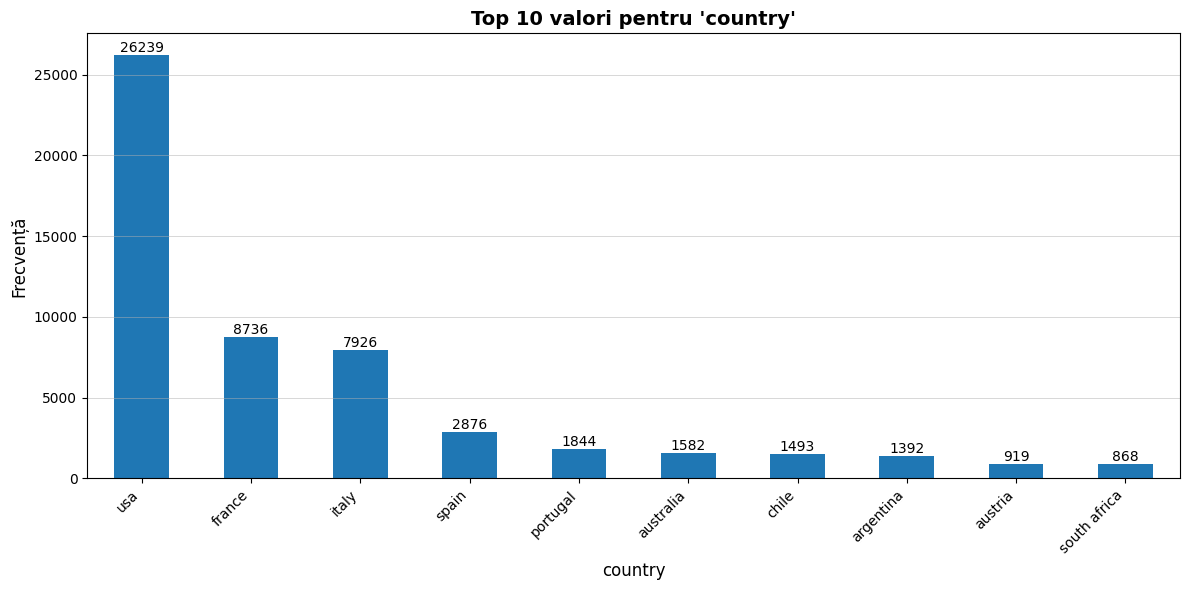


=== Distribuția pentru 'category' ===
category
red            39193
white          14077
rose            1744
sparkling       1358
dessert          551
port sherry      242
fortified         17
orange            14
Name: count, dtype: int64


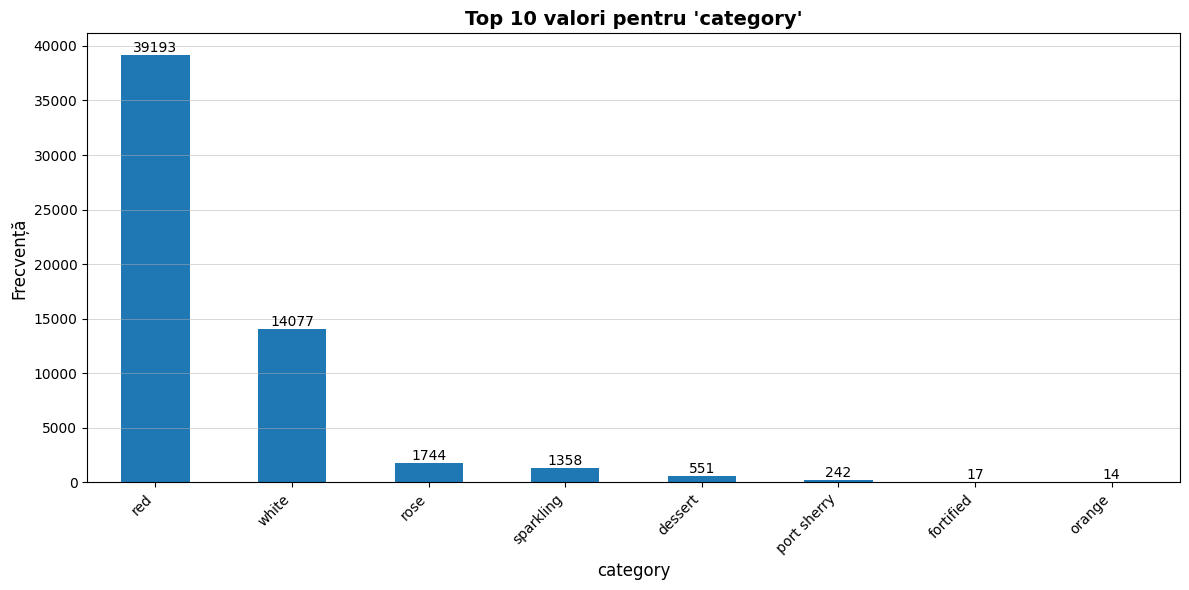


=== Distribuția pentru 'variety' ===
variety
pinot noir                               9883
chardonnay                               5038
cabernet sauvignon                       4252
red blend                                2924
bordeaux style red blend                 2237
                                         ... 
xynomavro                                   1
syrah touriga franca touriga nacional       1
albari o loureiro cai o blanco              1
cabernet sauvignon syrah petite sirah       1
saperavi cabernet sauvignon tavkveri        1
Name: count, Length: 1663, dtype: int64


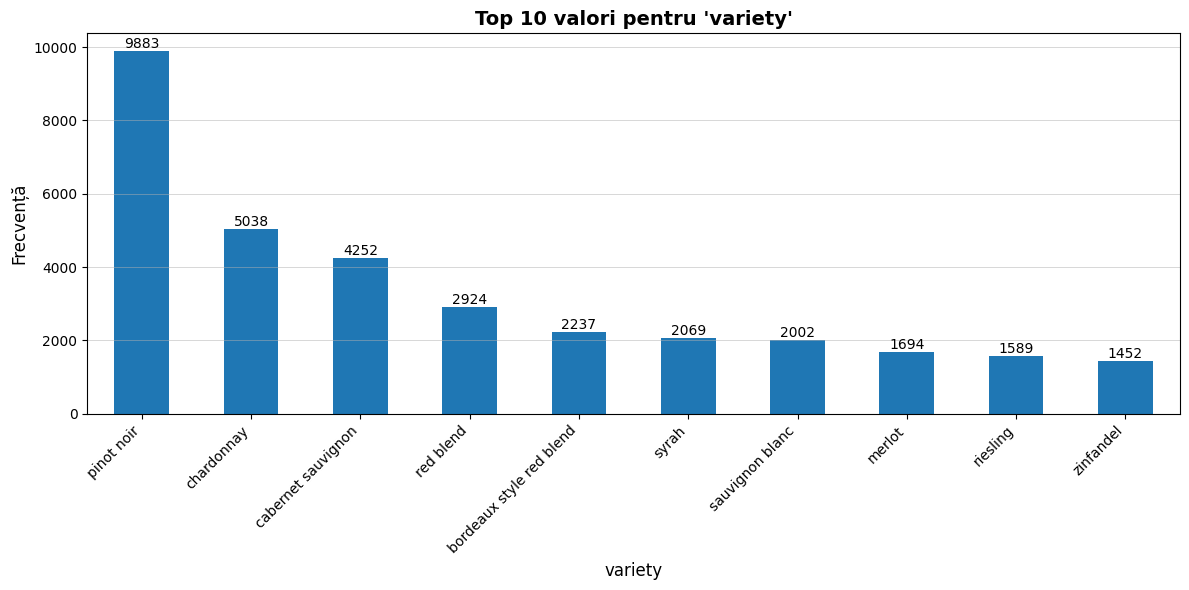

In [40]:

categorical_cols = ['country', 'category', 'variety']

for col in categorical_cols:
    print(f"\n=== Distribuția pentru '{col}' ===")
    print(df[col].value_counts())

    # Top 10
    top_values = df[col].value_counts().head(10)

    plt.figure(figsize=(12, 6))
    ax = top_values.plot(kind="bar")

    plt.title(f"Top 10 valori pentru '{col}'", fontsize=14, weight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frecvență", fontsize=12)

    plt.grid(axis='y', linewidth=0.5, alpha=0.7)

    plt.xticks(rotation=45, ha='right')

    # Adaugam valori numerice deasupra barelor
    for p in ax.patches:
        ax.annotate(
            str(p.get_height()), 
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha='center', va='bottom', fontsize=10
        )

    plt.tight_layout()
    plt.show()